In [612]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [631]:
c = 3 #clusters
m = 2.0 #so-called fuzzifier
error = 0.001
max_iter = 100
space = [[1, 0], [0, 1]]

X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])
train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)

In [614]:
#random Assignation matrix
#U = np.random.sample(size=(c, len(X)))
U = np.ones((c, len(X)))
U

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [615]:
#generate a series of centroids
def select_centers(c):
    iter = 0
    centers = []
    global space
    iter=0
    while iter < c:
        centers.append((random.uniform(space[0][0],space[0][1]), 
                        random.uniform(space[1][0],space[1][1])))
        iter=iter+1
    return centers

In [616]:
v = select_centers(c)
v

[(0.7747569390666491, 0.7003109618710837),
 (0.9911505149208503, 0.2084229631260489),
 (0.5576209550127225, 0.2906578196795955)]

In [617]:
#Defining the mahalnobis distance
def mahaldist(Xk, vi, space):
    VI_inv = np.linalg.inv(space)
    md2 = np.transpose((np.subtract(Xk, vi)))
    md2 = md2.dot(VI_inv)
    md2 = md2.dot(np.subtract(Xk, vi))
    return (md2**(.5))

In [618]:
#defining the eta value
def eta(u, m, d):
    um = u**m
    numerator = np.sum(np.dot(um, d**2))
    return numerator/np.sum(um)

In [619]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [620]:
X_norm

array([[0.00785855, 0.12356688],
       [0.01768173, 0.18853503],
       [0.01768173, 0.29490446],
       [0.15324165, 0.09732484],
       [0.17681729, 0.12993631],
       [0.09823183, 0.23566879],
       [0.91748527, 0.94363057],
       [1.        , 0.96815287],
       [0.5697446 , 1.        ],
       [0.42239686, 0.38503185]])

In [621]:
#using the aformentioned functions we can caluclate new iterations of U
def calc_u(X, U, v, c, m, space):
    S, N = X.shape
    newU = np.copy(U)
    for i in range(c):
        for k in range(N):
            d = mahaldist(column(X, k), v[i], space)
            n = eta(U[i][k], m, d)
            exp = 2./(m-1)
            d = d/n
            d = d**exp
            newU[i][k] = (1. + d)**(-1)
            
    return newU

In [622]:
new_U = calc_u(np.transpose(X_norm), U, v, c, m, space)
new_U

array([[0.47937461, 0.45506388, 0.42446616, 0.42853012, 0.40577318,
        0.40247801, 0.07371026, 0.10911055, 0.11648569, 0.18271177],
       [0.49343072, 0.48666273, 0.48852258, 0.41671714, 0.40094606,
        0.44384074, 0.35315139, 0.36599227, 0.4457307 , 0.26181361],
       [0.24820966, 0.23192927, 0.22573796, 0.16729138, 0.14591441,
        0.17631895, 0.35727515, 0.39566039, 0.33480267, 0.02647218]])

In [623]:
def calculate_differences(old_assignation, new_assignation):        
    return np.sum(np.abs(np.subtract(old_assignation, new_assignation)))

In [778]:
#Function to calcuate subsequent sets of centers
#@params: X - observations, U - assignation matrix, c - groups, m - modifier
def new_centers(X, U, c, m):
    new_v = []
    S, N = X.shape
    for i in range(c):
        numerator = np.zeros(2)
        denominator = 0
        for k in range(N):
            xk = column(X, k)
            numerator = np.add(numerator, np.dot(U[i][k]**m, xk))
            denominator += U[i][k]**m
        new_v.append(np.divide(numerator, denominator))
    return new_v

In [756]:
#The combined fkm clustering algorithm with its own set of variables
#Takes normalized X - observation 2D arrays as argument
def fkm(X, c=2, m=2, err=0.001, max_iter=100):
    space = [[1, 0],[0, 1]]
    U = np.ones((c, len(X)))
    v = select_centers(c)
    diff_limit = True
    iter = 0
    while diff_limit:
        newU = calc_u(np.transpose(X), U, v, c, m, space)
        v = new_centers(np.transpose(X), newU, c, m)

        if iter > 0:
            if np.absolute(calculate_differences(U, newU)) < err:
                diff_limit = False
        if iter > max_iter:
            break
        U = np.copy(newU)
        iter += 1
        
    return (v, U)

In [736]:
centroids, assignation = fkm(X_norm)

In [737]:
centroids

[array([0.85426223, 0.95660429]), array([0.09834448, 0.19062344])]

In [738]:
assignation

array([[0.58512258, 0.56328013, 0.53221049, 0.55152748, 0.5332145 ,
        0.52183538, 0.00414819, 0.02092563, 0.07649696, 0.33915003],
       [0.01252541, 0.00646872, 0.01708407, 0.0115826 , 0.00974501,
        0.00202499, 0.55317475, 0.58635547, 0.4673225 , 0.12495975]])

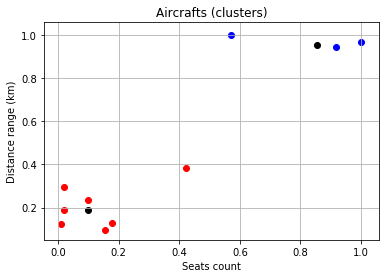

In [739]:
red = X_norm[np.where(np.array(np.transpose(assignation))[:,0]>0.3)]
blue = X_norm[np.where(np.array(np.transpose(assignation))[:,1]>0.2)]
 
fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
ax.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()